# Project: No-show appointment Data Analysis

# Introduction

In this "Investigate a Dataset" project, I will be analyzing the No-show appointment dataset to determine the relationship between the features and the extent to which the independent variables influence the target variable or the dependent variable. The percentage of people who showed up for their appointments would be calculated and analysis would be carried out to determine if the factors like diseases, being on schorlarship or receiving SMS influenced these patients availability to meet up with their appointments.   

Dataset description: The No-show appointment dataset which is original sourced on Kaggle contains information from over 100,000 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The dataset consists of 110527 rows and 14 columns.

Columns:
1. PatientId
2. AppointmentID
3. Gender
4. ScheduledDay
5. AppointmentDay
6. Age
7. Neighbourhood
8. Scholarship
9. Hypertension (originally Hipertension)
10. Diabetes
11. Alcoholism
12. Handicap (originally Handcap)
13. SMS_received
14. No-show


Questions for analysis

1. What percentage of people showed up for their appointment?
2. What is the percentage of people who did not show up for their appointment?
3. Does Gender influence availability of showing up for appointment?
4. Does age influence the No-show column?
5. What is the percentage of patients who did not receive scholarship compared to No-show column?
6. What is the percentage of patients who received scholarship compared to No-show?
7. What is the percentage of the people who did not receive messages with respect to No-show column?
8. What is the percentage of patients who received messages with respect to No-show column?
9. What is the percentage of non-diabetic patients with respect to No-show column?
10. What is the percentage of diabetic patients with respect to No-show column?
11. What is the percentage of non-hypertensive patients with respect to No-show column?
12. What is the percentage of hypertensive patients with respect to No-show column?

In [1]:
#import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Wrangling

In [2]:
#import the dataset
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#view the columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
#Data cleaning
#Rename the columns Hipertension and Handcap to Hypertension and Handicap
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)

In [6]:
#View the dataframe to confirm that the columns have been renamed
list(df)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received',
 'No-show']

In [7]:
#view the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#view the describe statistics of the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
#Get the rows and columns of the dataframe
df.shape

(110527, 14)

In [10]:
#View the first 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#check the number of nulls
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

In [12]:
#Number of unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No-show                2
dtype: int64

In [13]:
df.Age.value_counts().head()

0     3539
1     2273
52    1746
49    1652
53    1651
Name: Age, dtype: int64

In [14]:
df.Age.value_counts().tail()

 115    5
 100    4
 102    2
 99     1
-1      1
Name: Age, dtype: int64

In [15]:
df.query('Age== -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [16]:
#Data cleaning
#change the Age column to positive numbers as Age cannot be negative as shown in the output for describe function for min
df['Age'] =df['Age'].abs()

In [17]:
#view to confirm the change
df.Age.value_counts().tail()

98     6
115    5
100    4
102    2
99     1
Name: Age, dtype: int64

In [18]:
#view the change in descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088892,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110176,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [19]:
#create a new dataset to save the changes
df.to_csv('noshowappointments_edited.csv', index=False)

In [20]:
#Read the edited dataset
dfNew= pd.read_csv('noshowappointments_edited.csv')
dfNew.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
dfNew.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088892,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110176,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [22]:
#view the information of the dataframe
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [23]:
#Check the object type for ScheduledDay
type(dfNew['ScheduledDay'][0])

str

In [24]:
#Check the object type for AppointmentDay
type(dfNew['AppointmentDay'][0])

str

In [25]:
#Change it to datetime
dfNew['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

In [26]:
#Confirm the change
type(dfNew['AppointmentDay'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
#Change it to datetime
dfNew['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])

In [28]:
#Confirm the change
type(dfNew['ScheduledDay'][0])

pandas._libs.tslibs.timestamps.Timestamp

# Exploratory Data Analysis

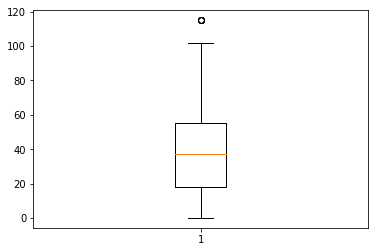

In [29]:
#Boxplot for Age
plt.boxplot(data=dfNew, x='Age');

### Function

A percentage function to show the amount of something expressed as a number out of 100.

In [30]:
#Function to calculate the percentage

def percentage(variable): 
    total= 110527
    #find the percentage and round it to 1 decimal place
    percent= round(((variable/total)*100), 1) 
    percent_age = str(percent) + '%'  # convert to string and append the percentage symbol %
    print(percent_age)   

1. What percentage of people showed up for their appointment?

In [31]:
#Calculate the percentage where No-show is No
percentage(dfNew[dfNew['No-show']== 'No'].count()['No-show'])

79.8%


2. What is the percentage of people who did not show up for their appointment?

In [32]:
#Calculate the percentage where No-show is Yes
percentage(dfNew[dfNew['No-show']== 'Yes'].count()['No-show'])

20.2%


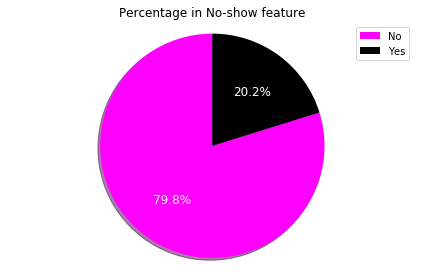

In [33]:
#Plot a piechart to show the percentage of questions 1 and 2
color= ("magenta", "black")
label=['No','Yes']
plt.pie(dfNew['No-show'].value_counts(), colors=color, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize':12,'color':'white'})
plt.title("Percentage in No-show feature")
plt.legend(label)
plt.axis('equal')
plt.tight_layout()
plt.show;

The piechart shows that more people showed up for their appointments.

In [34]:
#set the background of the graphs 
sns.set_style('darkgrid')

3. Does Gender influence availability of showing up for appointment?

In [35]:
#The  values of Gender with respect to No-show column
gender_show =dfNew.groupby(['Gender','No-show']).count()['Age']
gender_show

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: Age, dtype: int64

In [36]:
# Total counts for each gender
gender_count = dfNew.groupby('Gender').count()['Age']
gender_count

Gender
F    71840
M    38687
Name: Age, dtype: int64

In [37]:
#Get the proportion of females and males to do a proper comparison
# The proportion of females with respect to No-show 
f_show = gender_show['F'] / gender_count['F']
f_show

No-show
No     0.796854
Yes    0.203146
Name: Age, dtype: float64

In [38]:
# The proportion of males with respect to No-show 
m_show = gender_show['M'] / gender_count['M']
m_show

No-show
No     0.800321
Yes    0.199679
Name: Age, dtype: float64

In [39]:
ind = np.arange(len(f_show))  # the x locations for the groups
width = 0.35 #The width of the bars

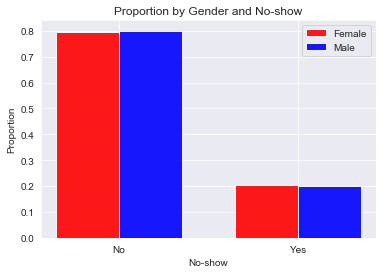

In [40]:
# plot the bars
red_bars = plt.bar(ind, f_show, width, color='r', alpha=.9, label='Female')
blue_bars = plt.bar(ind + width, m_show, width, color='b', alpha=.9, label='Male')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('No-show')
plt.title('Proportion by Gender and No-show')
locations = ind + width / 2  
labels = ['No', 'Yes']  
plt.xticks(locations, labels)
plt.legend();

From the barchart, the difference between female and male for No-show is very minute and shows that gender is not a good feature to determine availability for appointment.

4. Does age influence the No-show column?

Age will be grouped to form a new column called 'Age_group' in order to properly analyze its influence to the No-show column

In [41]:
# Bin edges that will be used to "cut" the age data into groups
bin_edges = [0,1,4,12,19,39,59,115]

# Labels for the seven age groups
bin_names = ['Infant','Toddler', 'Child', 'Teen', 'Adult', 'Middle_Age_Adult', 'Senior_Adult']

# Creates age_group column
dfNew['Age_group'] = pd.cut(dfNew['Age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column by viewing the first 2 rows
dfNew.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Senior_Adult
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Middle_Age_Adult


In [42]:
#The  values of Age group with respect to No-show column
age_grp =dfNew.groupby(['Age_group','No-show']).count()['Age']
age_grp

Age_group         No-show
Infant            No          1859
                  Yes          415
Toddler           No          3619
                  Yes          811
Child             No          8352
                  Yes         2442
Teen              No          6941
                  Yes         2434
Adult             No         22190
                  Yes         6680
Middle_Age_Adult  No         24416
                  Yes         5656
Senior_Adult      No         17931
                  Yes         3242
Name: Age, dtype: int64

In [43]:
# Total counts for each age agoup
age_count = dfNew.groupby('Age_group').count()['Age']
age_count

Age_group
Infant               2274
Toddler              4430
Child               10794
Teen                 9375
Adult               28870
Middle_Age_Adult    30072
Senior_Adult        21173
Name: Age, dtype: int64

In [44]:
# The proportion of infants with respect to No-show 
in_show = age_grp['Infant'] / age_count['Infant']
in_show

No-show
No     0.817502
Yes    0.182498
Name: Age, dtype: float64

In [45]:
# The proportion of toddlers with respect to No-show 
tod_show = age_grp['Toddler'] / age_count['Toddler']
tod_show

No-show
No     0.81693
Yes    0.18307
Name: Age, dtype: float64

In [46]:
# The proportion of child with respect to No-show 
chd_show = age_grp['Child'] / age_count['Child']
chd_show

No-show
No     0.773763
Yes    0.226237
Name: Age, dtype: float64

In [47]:
# The proportion of teens with respect to No-show 
teen_show = age_grp['Teen'] / age_count['Teen']
teen_show

No-show
No     0.740373
Yes    0.259627
Name: Age, dtype: float64

In [48]:
# The proportion of adults with respect to No-show 
adlt_show = age_grp['Adult'] / age_count['Adult']
adlt_show

No-show
No     0.768618
Yes    0.231382
Name: Age, dtype: float64

In [49]:
# The proportion of middle age adults with respect to No-show 
madlt_show = age_grp['Middle_Age_Adult'] / age_count['Middle_Age_Adult']
madlt_show

No-show
No     0.811918
Yes    0.188082
Name: Age, dtype: float64

In [50]:
# The proportion of senior adults with respect to No-show 
sadlt_show = age_grp['Senior_Adult'] / age_count['Senior_Adult']
sadlt_show

No-show
No     0.84688
Yes    0.15312
Name: Age, dtype: float64

In [51]:
indx = np.arange(len(sadlt_show))  # the x locations for the groups

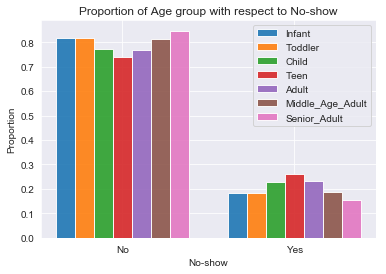

In [52]:
# plot the bars
width1 = 0.11 
blue_bars = plt.bar(indx, in_show, width1,  alpha=.9, label='Infant')
yel_bars = plt.bar(indx + width1, tod_show, width1, alpha=.9, label='Toddler')
green_bars = plt.bar(indx + width1*2, chd_show, width1, alpha=.9, label='Child')
red_bars = plt.bar(indx + width1*3, teen_show, width1, alpha=.9, label='Teen')
pur_bars = plt.bar(indx + width1*4, adlt_show, width1, alpha=.9, label='Adult')
brown_bars = plt.bar(indx + width1*5, madlt_show, width1, alpha=.9, label='Middle_Age_Adult')
pink_bars = plt.bar(indx + width1*6, sadlt_show, width1, alpha=.9, label='Senior_Adult')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('No-show')
plt.title('Proportion of Age group with respect to No-show')
locations = indx + width1*3  
labels = ['No', 'Yes'] 

plt.xticks(locations, labels)
plt.legend();

The barchart shows the proportion of patients' response to appointment based on Age group. It can be observed that more teenagers did not show up for their appointment compared to the other groups, while senior adults response to appointment was highest amongst the groups. For more visual representation line plots will be ploted below

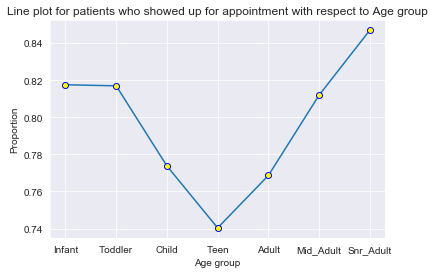

In [53]:
#Line plot for Age group of patients who showed up i.e No-show is No
x_No =('Infant','Toddler', 'Child', 'Teen', 'Adult', 'Mid_Adult', 'Snr_Adult')
y_No=[in_show[0],tod_show[0],chd_show[0], teen_show[0], adlt_show[0], madlt_show[0], sadlt_show[0]] #using the proportions

plt.xlabel('Age group')
plt.ylabel('Proportion')
plt.plot(x_No, y_No, marker="o", markeredgecolor='blue', markerfacecolor='yellow')
plt.title('Line plot for patients who showed up for appointment with respect to Age group');

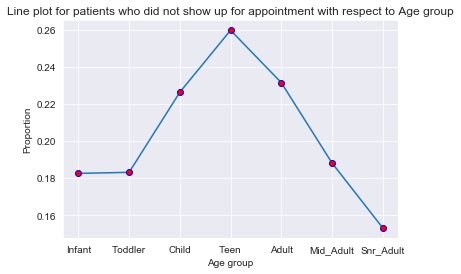

In [54]:
#Line plot for Age group of patients who did not show up i.e No-show is Yes
x_Yes=('Infant','Toddler', 'Child', 'Teen', 'Adult', 'Mid_Adult', 'Snr_Adult')

y_Yes=[in_show[1],tod_show[1],chd_show[1], teen_show[1], adlt_show[1], madlt_show[1], sadlt_show[1]]

plt.xlabel('Age group')
plt.ylabel('Proportion')
plt.plot(x_Yes,y_Yes, marker="o", markeredgecolor='blue',markerfacecolor='red')
plt.title('Line plot for patients who did not show up for appointment with respect to Age group');

5. What is the percentage of patients who did not receive scholarship compared to No-show column?

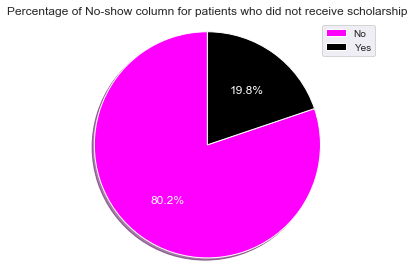

In [55]:
#Patients who did not receive scholarship (0)
dfNew_Sch_0 = dfNew.query('Scholarship == 0')

#Plot a piechart for No-show column with respect to patients who did not receive scholarship (0)  
color= ("magenta", "black")
label=['No','Yes']
plt.pie(dfNew_Sch_0['No-show'].value_counts(), colors=color, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize':12,'color':'white'})
plt.title("Percentage of No-show column for patients who did not receive scholarship")
plt.legend(label)
plt.axis('equal')
plt.tight_layout()
plt.show;

The piechart shows a higher percentage of patients who did not receive scholarship but still showed up for their appointment.

6. What is the percentage of patients who received scholarship compared to No-show?

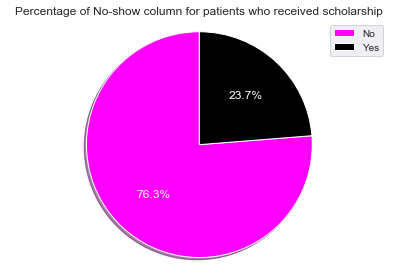

In [56]:
#Patients who received scholarship (1)
dfNew_Sch_1 = dfNew.query('Scholarship == 1')

#Plot a piechart for No-show column with respect to patients who received scholarship (1)  
color= ("magenta", "black")
label=['No','Yes']
plt.pie(dfNew_Sch_1['No-show'].value_counts(), colors=color, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize':12,'color':'white'})
plt.title("Percentage of No-show column for patients who received scholarship")
plt.legend(label)
plt.axis('equal')
plt.tight_layout()
plt.show;

From the piechart 23.7% did not show up for their appointment despite being on scholarship

7. What is the percentage of the people who did not receive messages with respect to No-show column?

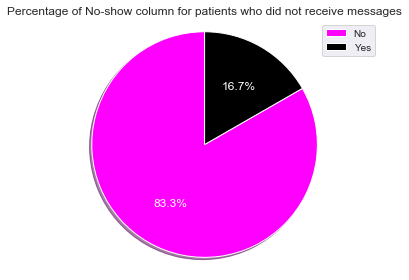

In [57]:
#Patients who did not receive message (0)
dfNew_msg_0 = dfNew.query('SMS_received == 0')

#Plot a piechart for No-show column with respect to patients who did not receive message (0)  
color= ("magenta", "black")
label=['No','Yes']
plt.pie(dfNew_msg_0['No-show'].value_counts(), colors=color, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize':12,'color':'white'})
plt.title("Percentage of No-show column for patients who did not receive messages")
plt.legend(label)
plt.axis('equal')
plt.tight_layout()
plt.show;

The piechart shows that 83.3% showed up for appointments regardless of the fact that they did not receive messages.

8. What is the percentage of patients who received messages with respect to No-show column?

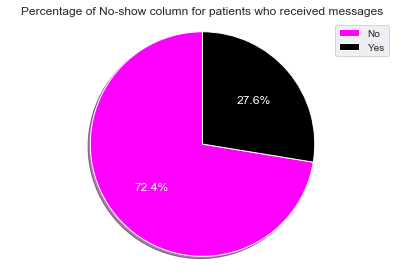

In [58]:
#Patients who received message (1)
dfNew_msg_1 = dfNew.query('SMS_received == 1')

#Plot a piechart for No-show column with respect to patients who received message (0)  
color= ("magenta", "black")
label=['No','Yes']
plt.pie(dfNew_msg_1['No-show'].value_counts(), colors=color, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize':12,'color':'white'})
plt.title("Percentage of No-show column for patients who received messages")
plt.legend(label)
plt.axis('equal')
plt.tight_layout()
plt.show;

The piechart shows that 27.6% did not show for their appointments despite having received messages.



9. What is the percentage of non-diabetic patients with respect to No-show column?

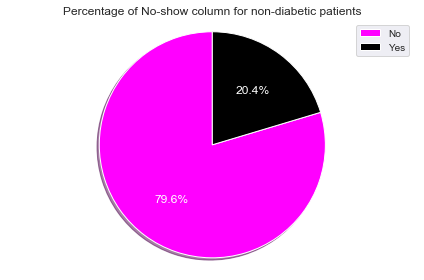

In [59]:
#Non-diabetic patients  (0)
dfNew_dia_0 = dfNew.query('Diabetes == 0')

#Plot a piechart for No-show column with respect to patients who are not diabetic (0)  
color= ("magenta", "black")
label=['No','Yes']
plt.pie(dfNew_dia_0['No-show'].value_counts(), colors=color, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize':12,'color':'white'})
plt.title("Percentage of No-show column for non-diabetic patients")
plt.legend(label)
plt.axis('equal')
plt.tight_layout()
plt.show;

The piechart shows that 79.6% of non-diabetic patients showed for their appointments while 20.4% did not show.

10. What is the percentage of diabetic patients with respect to No-show column?

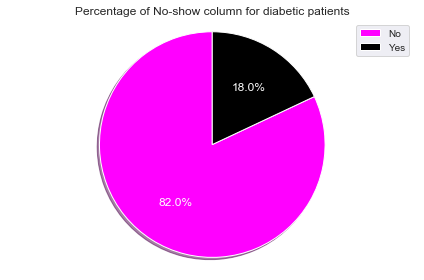

In [60]:
#Diabetic patients  (1)
dfNew_dia_1 = dfNew.query('Diabetes == 1')

#Plot a piechart for No-show column with respect to patients who are diabetic (1)  
color= ("magenta", "black")
label=['No','Yes']
plt.pie(dfNew_dia_1['No-show'].value_counts(), colors=color, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize':12,'color':'white'})
plt.title("Percentage of No-show column for diabetic patients")
plt.legend(label)
plt.axis('equal')
plt.tight_layout()
plt.show;


The piechart shows that 82% of diabetic patients showed for their appointments while 18% did not show up.

11. What is the percentage of non-hypertensive patients with respect to No-show column?

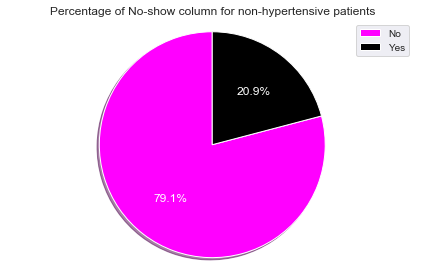

In [61]:
#Non-hypertensive patients  (0)
dfNew_hyp_0 = dfNew.query('Hypertension == 0')

#Plot a piechart for No-show column with respect to patients who are not hypertensive (0)  
color= ("magenta", "black")
label=['No','Yes']
plt.pie(dfNew_hyp_0['No-show'].value_counts(), colors=color, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize':12,'color':'white'})
plt.title("Percentage of No-show column for non-hypertensive patients")
plt.legend(label)
plt.axis('equal')
plt.tight_layout()
plt.show;

The piechart shows that 79.1% of non-hypertensive patients showed up for their appointments while 20.9% did not.

12. What is the percentage of hypertensive patients with respect to No-show column?

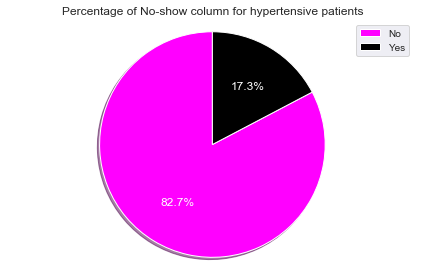

In [62]:
#Hypertensive patients  (1)
dfNew_hyp_1 = dfNew.query('Hypertension == 1')

#Plot a piechart for No-show column with respect to patients who are hypertensive (1)  
color= ("magenta", "black")
label=['No','Yes']
plt.pie(dfNew_hyp_1['No-show'].value_counts(), colors=color, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize':12,'color':'white'})
plt.title("Percentage of No-show column for hypertensive patients")
plt.legend(label)
plt.axis('equal')
plt.tight_layout()
plt.show;

The piechart shows that 82.7% of hypertensive patients showed up for their appointments while 17.3% did not.

# Conclusion

1. The difference in gender with respect to No-show is extremely small and shows that gender is not a good feature to determine availability for appointment.

2. Age_group which was derived from Age shows that age influences the availability of patients for appointments as 'Senior adults'(60 years and above) patients showed the highest availability for appointments while teenagers (13 - 19 years) had the least.

3. More patients showed up for their appointments despite not being part of the scholarship program which indicates that having scholarship dosen't influence patient's availability for appointment. 

4. The messages sent to patients does not have significant effect on the patient's avilability for their appointment as a greater percentage of patients who did not receive sms showed up for their appointment than those who received the sms.

5. Diseases influences patients availability for appointment as patients who had either hypertension or diabetes showed up more.



# Limitations

1. Assumptions were made in the analysis process based on my understanding of the dataset.
2. Some variables were categorical and could not be used in the analysis.

# References

1. Udacity lessons
2. https://stackoverflow.com
3. www.statology.org
4. https://dictionary.cambridge.org
5. https://pythonspot.com
6. www.tutorialspoint.com